## Predict Avocado Price Rate using Prophet

### Theoretical Concepts

**DATASET DESCRIPTION:**

- Data represents weekly 2018 retail scan data for National retail volume (units) and price. 
- Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
- The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
- The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from matplotlib import pyplot as plt
from prophet import Prophet
from ipywidgets import widgets, interact, Dropdown, Button
from IPython.display import clear_output

In [2]:
#Uncomment below lines to Load csv from Google Drive.
'''
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/CSV Datasets/'

filename = root_path + "avocado.csv"
'''

#Loading from local runtime
filename = "../Datasets/avocado.csv"

In [3]:
avocado_df = pd.read_csv(filename)
avocado_df.shape

(18249, 14)

In [4]:
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
avocado_df.drop(avocado_df.columns[0], axis=1, inplace=True)
avocado_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
avocado_df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [7]:
avocado_df = avocado_df.sort_values('Date').reset_index(drop=True)
avocado_df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
1,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
2,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
3,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
4,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
5,2015-01-04,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.00,conventional,2015,WestTexNewMexico
6,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,LosAngeles
7,2015-01-04,1.50,6329.83,3730.80,2141.91,0.00,457.12,426.67,30.45,0.00,organic,2015,LasVegas
8,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
9,2015-01-04,0.80,317861.35,134003.07,120628.37,4591.23,58638.68,58126.59,512.09,0.00,conventional,2015,LasVegas


In [8]:
#using ipywidgets for interactive graphs
def plot_graph(x_col, y_col):
    plt.figure(figsize=(20,10))
    plt.plot(avocado_df[x_col], avocado_df[y_col])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(str(x_col) + " v/s " + str(y_col))
    plt.xticks(rotation=45)
    plt.show()
    
# Create the dropdowns for the x-axis and y-axis columns.   
x_col_drop = Dropdown(options=avocado_df.columns)
y_col_drop = Dropdown(options=avocado_df.columns)

# Create the interactive function.
@interact(x_col=x_col_drop, y_col=y_col_drop)
def plot(x_col, y_col):
    plot_graph(x_col, y_col)

interactive(children=(Dropdown(description='x_col', options=('Date', 'AveragePrice', 'Total Volume', '4046', '…

In [9]:
#using ipywidgets for interactive graphs

def plot_count_graph(x_col):
    plt.figure(figsize=(25,12))
    sns.countplot(x = x_col, data = avocado_df)
    plt.xticks(rotation=45)
    plt.show()
    
# Create the dropdowns for the x-axis  
x_col_drop = Dropdown(options=avocado_df.columns[-3:])

# Create the interactive function.
@interact(x_col=x_col_drop)
def plot(x_col):
    plot_count_graph(x_col)

interactive(children=(Dropdown(description='x_col', options=('type', 'year', 'region'), value='type'), Output(…

In [10]:
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]
avocado_prophet_df.head()

,Date,AveragePrice
0,2015-01-04,1.75
1,2015-01-04,1.49
2,2015-01-04,1.68
3,2015-01-04,1.52
4,2015-01-04,1.64


In [13]:
#renaming columns so it is easy for prophet model
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date':'ds', 'AveragePrice':'y'})
avocado_prophet_df

,ds,y
0,2015-01-04,1.75
1,2015-01-04,1.49
2,2015-01-04,1.68
3,2015-01-04,1.52
4,2015-01-04,1.64
...,...,...
18244,2018-03-25,1.36
18245,2018-03-25,0.70
18246,2018-03-25,1.42
18247,2018-03-25,1.70


In [14]:
m = Prophet()
m.fit(avocado_prophet_df)

21:59:26 - cmdstanpy - INFO - Chain [1] start processing
21:59:29 - cmdstanpy - INFO - Chain [1] done processing


In [15]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [16]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.497220,0.897155,1.892202,1.497220,1.497220,-0.112756,-0.112756,-0.112756,-0.112756,-0.112756,-0.112756,0.0,0.0,0.0,1.384464
1,2015-01-11,1.492220,0.935837,1.936718,1.492220,1.492220,-0.104283,-0.104283,-0.104283,-0.104283,-0.104283,-0.104283,0.0,0.0,0.0,1.387937
2,2015-01-18,1.487221,0.918871,1.887095,1.487221,1.487221,-0.103967,-0.103967,-0.103967,-0.103967,-0.103967,-0.103967,0.0,0.0,0.0,1.383254
3,2015-01-25,1.482221,0.858689,1.860705,1.482221,1.482221,-0.122958,-0.122958,-0.122958,-0.122958,-0.122958,-0.122958,0.0,0.0,0.0,1.359263
4,2015-02-01,1.477222,0.840854,1.793385,1.477222,1.477222,-0.151372,-0.151372,-0.151372,-0.151372,-0.151372,-0.151372,0.0,0.0,0.0,1.325850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.159300,0.511684,1.615224,0.965704,1.349724,-0.086201,-0.086201,-0.086201,-0.086201,-0.086201,-0.086201,0.0,0.0,0.0,1.073099
530,2019-03-22,1.158564,0.543485,1.576915,0.964419,1.349995,-0.084544,-0.084544,-0.084544,-0.084544,-0.084544,-0.084544,0.0,0.0,0.0,1.074019
531,2019-03-23,1.157828,0.531094,1.595827,0.963166,1.350297,-0.082616,-0.082616,-0.082616,-0.082616,-0.082616,-0.082616,0.0,0.0,0.0,1.075212
532,2019-03-24,1.157092,0.487296,1.577228,0.961191,1.350599,-0.080435,-0.080435,-0.080435,-0.080435,-0.080435,-0.080435,0.0,0.0,0.0,1.076657


In [17]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

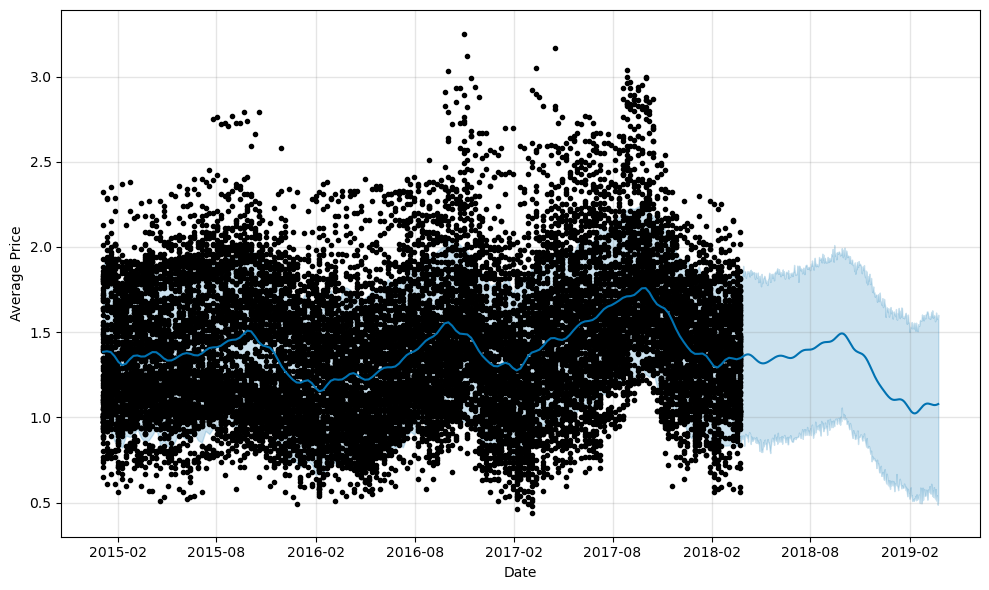

In [18]:
#Visualize predictions for the future
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Average Price')

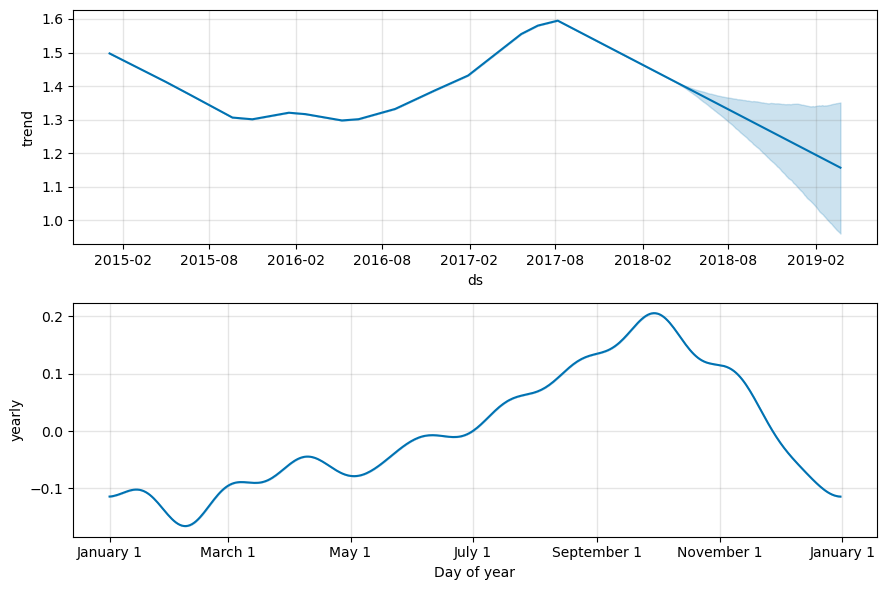

In [19]:
figure = m.plot_components(forecast)

In [30]:
#Checking trends and forecasting for region specific data

avocado_df_reg = pd.read_csv(filename)
avocado_df_reg.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [31]:
avocado_df_reg.drop(avocado_df_reg.columns[0], axis=1, inplace=True)
avocado_df_reg.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [32]:
avocado_df_reg = avocado_df_reg[avocado_df_reg['region'] == 'West']
avocado_df_reg.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West


In [33]:
avocado_df_reg = avocado_df_reg.sort_values('Date')
avocado_df_reg.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West


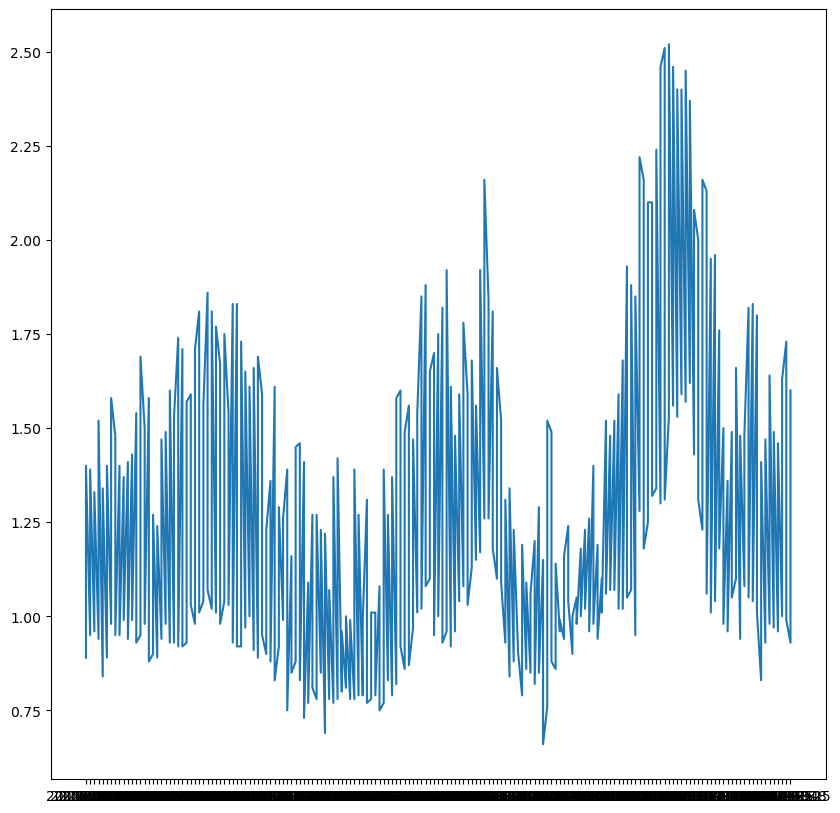

In [35]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df_reg['Date'], avocado_df_reg['AveragePrice'])

In [37]:
avocado_df_reg = avocado_df_reg.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [38]:
avocado_df_reg

,ds,y,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2755,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11881,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2754,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
11880,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2753,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18227,2018-03-11,1.63,264691.87,27566.25,60383.57,276.42,176465.63,107174.93,69290.70,0.00,organic,2018,West
18226,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


In [40]:
m_reg = Prophet()
m_reg.fit(avocado_df_reg)
future_reg = m_reg.make_future_dataframe(periods=365)
forecast_reg = m_reg.predict(future_reg)

22:20:12 - cmdstanpy - INFO - Chain [1] start processing
22:20:12 - cmdstanpy - INFO - Chain [1] done processing


In [41]:
forecast_reg

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.244729,0.608213,1.454228,1.244729,1.244729,-0.184899,-0.184899,-0.184899,-0.184899,-0.184899,-0.184899,0.0,0.0,0.0,1.059830
1,2015-01-11,1.243886,0.673708,1.477204,1.243886,1.243886,-0.165306,-0.165306,-0.165306,-0.165306,-0.165306,-0.165306,0.0,0.0,0.0,1.078580
2,2015-01-18,1.243043,0.631887,1.525543,1.243043,1.243043,-0.156117,-0.156117,-0.156117,-0.156117,-0.156117,-0.156117,0.0,0.0,0.0,1.086925
3,2015-01-25,1.242200,0.643016,1.520500,1.242200,1.242200,-0.168805,-0.168805,-0.168805,-0.168805,-0.168805,-0.168805,0.0,0.0,0.0,1.073395
4,2015-02-01,1.241357,0.602799,1.457386,1.241357,1.241357,-0.191199,-0.191199,-0.191199,-0.191199,-0.191199,-0.191199,0.0,0.0,0.0,1.050158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.735712,1.114073,1.972000,1.710833,1.762517,-0.204399,-0.204399,-0.204399,-0.204399,-0.204399,-0.204399,0.0,0.0,0.0,1.531313
530,2019-03-22,1.736290,1.100373,1.997522,1.711226,1.763212,-0.199313,-0.199313,-0.199313,-0.199313,-0.199313,-0.199313,0.0,0.0,0.0,1.536978
531,2019-03-23,1.736868,1.104014,1.947630,1.711710,1.763845,-0.193660,-0.193660,-0.193660,-0.193660,-0.193660,-0.193660,0.0,0.0,0.0,1.543208
532,2019-03-24,1.737447,1.131653,1.977409,1.712223,1.764479,-0.187547,-0.187547,-0.187547,-0.187547,-0.187547,-0.187547,0.0,0.0,0.0,1.549899


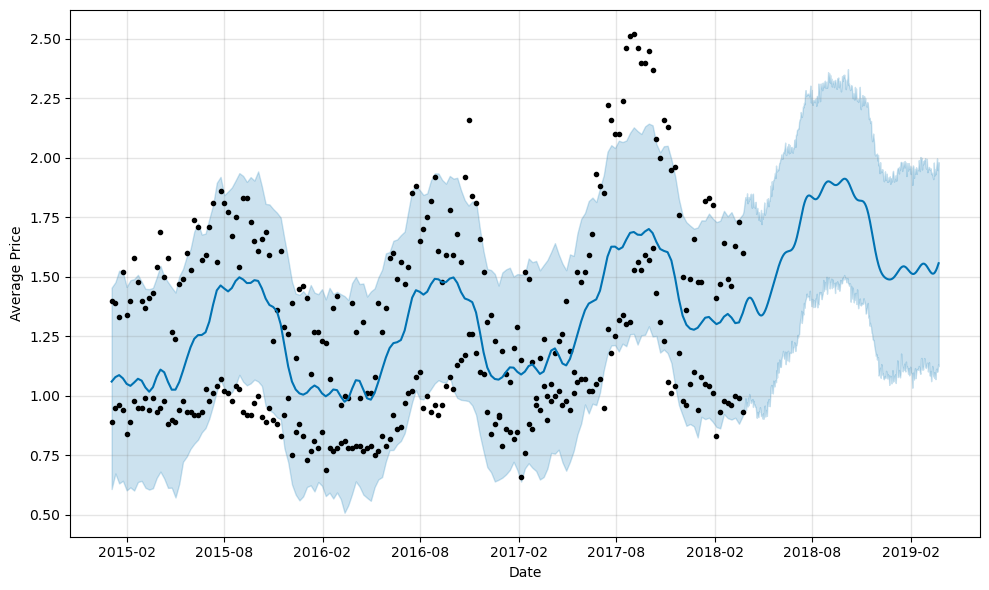

In [43]:
figure = m_reg.plot(forecast_reg, xlabel = 'Date', ylabel = 'Average Price')

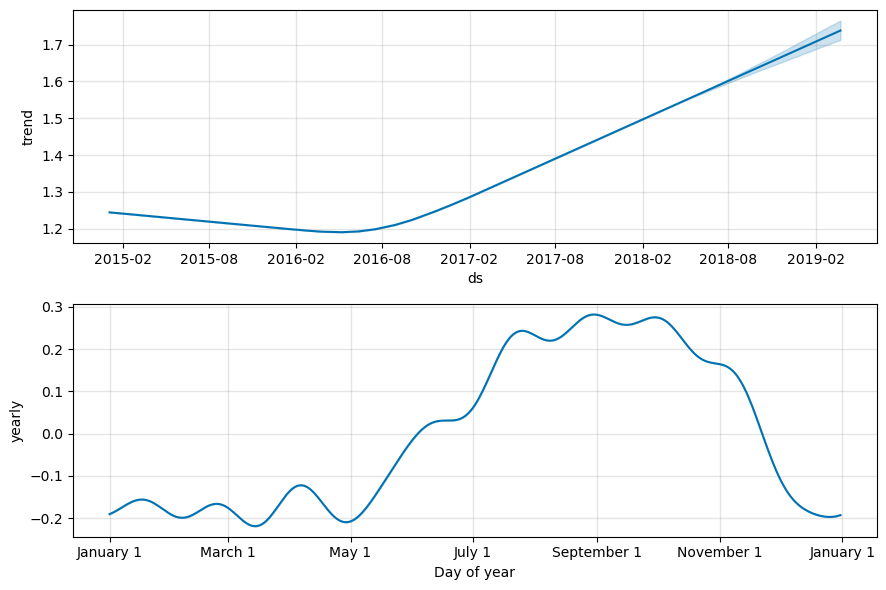

In [44]:
figure = m_reg.plot_components(forecast_reg)